In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from collections import defaultdict
from functools import partial

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics
from scipy.stats import randint, uniform
from sklearn.externals import joblib


# Global variables
# Set random seed for repeatability
seed = 42
out_dir = 'model_output'
n_folds = 10
n_iter_search = 50


def exclude_rare_taxa(x, threshold=3):
  ##Summing the whole column  
    to_keep = (x > threshold).sum(axis=0) != 0
    return x[:, to_keep]


# Define functions for evaluation metrics
##functools.partial(func, /, *args, **keywords)
##Return a new partial object which when called will behave like func called with the positional arguments args and keyword arguments keywords
## micro:Calculate metrics globally by counting the total true positives, false negatives and false positives
f1_micro = partial(metrics.f1_score, average='micro')
##'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
f1_macro = partial(metrics.f1_score, average='macro')
##'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall
f1_weighted = partial(metrics.f1_score, average='weighted')

##precision
precision_micro = partial(metrics.precision_score, average='micro')
precision_macro = partial(metrics.precision_score, average='macro')
precision_weighted = partial(metrics.precision_score, average='weighted')

##recall
recall_micro = partial(metrics.recall_score, average='micro')
recall_macro = partial(metrics.recall_score, average='macro')
recall_weighted = partial(metrics.recall_score, average='weighted')


def train_and_validate(pipe, x_train, y_train, x_test, y_test, test_metrics,
                       scores):
    '''
    Return trained pipeline and confusion matrix. Also populate test_metrics
    dictionary and scores dictionary.
    '''
    pipe.fit(x_train, y_train)
    ##predict_proba: Returns the probability of the samples for each class in the model. The columns correspond to the classes in sorted order, as they appear in the attribute classes_
    y_proba = pipe.predict_proba(x_test)
    ##numpy.argmax(a, axis=None, out=None): Returns the indices of the maximum values along an axis. Axis= is the highest for each column.
    y_pred = y_proba.argmax(axis=1)

    # Calculate confusion matrix on test set data
    confusion_mat = metrics.confusion_matrix(y_test, y_pred)

    for name, metric_fn in [('accuracy', metrics.accuracy_score),
                            ('kappa', metrics.cohen_kappa_score),
                            ('f1_macro', f1_macro),
                            ('f1_micro', f1_micro),
                            ('f1_weighted', f1_weighted),
                            ('precision_macro', precision_macro),
                            ('precision_micro', precision_micro),
                            ('precision_weighted', precision_weighted),
                            ('recall_macro', recall_macro),
                            ('recall_micro', recall_micro),
                            ('recall_weighted', recall_weighted)]:
        score = metric_fn(y_test, y_pred)
        test_metrics[name].append(score)

    # Calculate mean decrease in accuracy over 10 permutations
    acc = metrics.accuracy_score(y_test, y_pred)
    names = list(pollen_only)
    np.random.seed(seed)
    for i in range(x.shape[1]):
        # shuffle 10 times
        for j in range(10):
            x_test_copy = x_test.copy()
            np.random.shuffle(x_test_copy[:, i])
            shuff_acc = metrics.accuracy_score(
                y_test,
                pipe.predict_proba(x_test_copy).argmax(axis=1))
            scores[names[i]].append((acc - shuff_acc) / acc)

    return pipe, confusion_mat



/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import tarfile
from six.moves import urllib

#Variables
file_path = os.path.join(".")
file_name = "OlsenVeg.csv"
file_url ="https://raw.githubusercontent.com/octokami/PredictiveBiomeModelling/master/OlsenVeg.csv"

#Import
def fetch_file_data(file_url, file_path):
  os.makedirs(file_path, exist_ok=True)
  csv_path = os.path.join(file_path, file_name)
  urllib.request.urlretrieve(file_url, csv_path)
fetch_file_data(file_url, file_path)

('./OlsenVeg.csv', <http.client.HTTPMessage at 0x7fd919d58d90>)

Max: 0.9980039920000001; Min: 0.0
################################################################################
Fitting: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   28.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  1.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best parameters:
{'C': 325.183322026747, 'class_weight': None, 'fit_intercept': False, 'multi_class': 'multinomial', 'solver': 'lbfgs'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Summary on test set:
Model: LogisticRegression
##################################################
accuracy                : 0.82883 (0.00000)
f1_macro                : 0.68061 (0.00000)
f1_micro                : 0.82883 (0.00000)
f1_weighted             : 0.82283 (0.00000)
kappa                   : 0.75756 (0.00000)
precision_macro         : 0.69626 (0.00000)
precision_micro         : 0.82883 (0.00000)
precision_weighted      : 0.82336 (0.00000)
recall_macro            : 0.67081 (0.00000)
recall_micro            : 0.82883 (0.00000)
recall_weighted         : 0.82883 (0.00000)
################################################################################
Fitting: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   53.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  2.6min finished


Best parameters:
{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 0.007066305219717406, 'n_estimators': 98}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Summary on test set:
Model: RandomForestClassifier
##################################################
accuracy                : 0.85586 (0.00000)
f1_macro                : 0.68074 (0.00000)
f1_micro                : 0.85586 (0.00000)
f1_weighted             : 0.85035 (0.00000)
kappa                   : 0.80063 (0.00000)
precision_macro         : 0.67134 (0.00000)
precision_micro         : 0.85586 (0.00000)
precision_weighted      : 0.85101 (0.00000)
recall_macro            : 0.69562 (0.00000)
recall_micro            : 0.85586 (0.00000)
recall_weighted         : 0.85586 (0.00000)
################################################################################
Fitting: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   29.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  8.9min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed: 10.5min finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (123) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:
{'activation': 'relu', 'alpha': 0.017436642900499146, 'batch_size': 32, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'max_iter': 123, 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (123) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Summary on test set:
Model: MLPClassifier
##################################################
accuracy                : 0.76577 (0.00000)
f1_macro                : 0.61455 (0.00000)
f1_micro                : 0.76577 (0.00000)
f1_weighted             : 0.75905 (0.00000)
kappa                   : 0.67092 (0.00000)
precision_macro         : 0.61334 (0.00000)
precision_micro         : 0.76577 (0.00000)
precision_weighted      : 0.75404 (0.00000)
recall_macro            : 0.61674 (0.00000)
recall_micro            : 0.76577 (0.00000)
recall_weighted         : 0.76577 (0.00000)
################################################################################
Fitting: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    8.5s finished


Best parameters:
{'n_components': 3, 'solver': 'svd'}

Summary on test set:
Model: LinearDiscriminantAnalysis
##################################################
accuracy                : 0.77477 (0.00000)
f1_macro                : 0.65493 (0.00000)
f1_micro                : 0.77477 (0.00000)
f1_weighted             : 0.78690 (0.00000)
kappa                   : 0.68883 (0.00000)
precision_macro         : 0.67172 (0.00000)
precision_micro         : 0.77477 (0.00000)
precision_weighted      : 0.80189 (0.00000)
recall_macro            : 0.64055 (0.00000)
recall_micro            : 0.77477 (0.00000)
recall_weighted         : 0.77477 (0.00000)
################################################################################
Fitting: GaussianNB(priors=None, var_smoothing=1e-09)

Summary on test set:
Model: GaussianNB
##################################################
accuracy                : 0.61261 (0.00000)
f1_macro                : 0.56445 (0.00000)
f1_micro                : 0.61261 (0.0000

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 493 out of 500 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.2s finished


Best parameters:
{'alpha': 0.388677289689482, 'fit_prior': False}

Summary on test set:
Model: MultinomialNB
##################################################
accuracy                : 0.73874 (0.00000)
f1_macro                : 0.59343 (0.00000)
f1_micro                : 0.73874 (0.00000)
f1_weighted             : 0.73693 (0.00000)
kappa                   : 0.63913 (0.00000)
precision_macro         : 0.58597 (0.00000)
precision_micro         : 0.73874 (0.00000)
precision_weighted      : 0.74195 (0.00000)
recall_macro            : 0.61098 (0.00000)
recall_micro            : 0.73874 (0.00000)
recall_weighted         : 0.73874 (0.00000)
################################################################################
Fitting: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.8s finished


Best parameters:
{'alpha': 0.005522117123602399, 'fit_prior': True}

Summary on test set:
Model: BernoulliNB
##################################################
accuracy                : 0.76577 (0.00000)
f1_macro                : 0.68661 (0.00000)
f1_micro                : 0.76577 (0.00000)
f1_weighted             : 0.76785 (0.00000)
kappa                   : 0.68695 (0.00000)
precision_macro         : 0.66643 (0.00000)
precision_micro         : 0.76577 (0.00000)
precision_weighted      : 0.80366 (0.00000)
recall_macro            : 0.74988 (0.00000)
recall_micro            : 0.76577 (0.00000)
recall_weighted         : 0.76577 (0.00000)
################################################################################
Fitting: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  74 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 396 tasks      | elapsed:   20.0s
[Parallel(n_jobs=4)]: Done 493 out of 500 | elapsed:   21.2s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   21.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters:
{'algorithm': 'brute', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

Summary on test set:
Model: KNeighborsClassifier
##################################################
accuracy                : 0.80180 (0.00000)
f1_macro                : 0.66112 (0.00000)
f1_micro                : 0.80180 (0.00000)
f1_weighted             : 0.79395 (0.00000)
kappa                   : 0.72158 (0.00000)
precision_macro         : 0.66984 (0.00000)
precision_micro         : 0.80180 (0.00000)
precision_weighted      : 0.79172 (0.00000)
recall_macro            : 0.65860 (0.00000)
recall_micro            : 0.80180 (0.00000)
recall_weighted         : 0.80180 (0.00000)
################################################################################
Fitting: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
        

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters:
{'class_weight': None, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 0.03131329245555858, 'splitter': 'random'}

Summary on test set:
Model: DecisionTreeClassifier
##################################################
accuracy                : 0.75676 (0.00000)
f1_macro                : 0.60993 (0.00000)
f1_micro                : 0.75676 (0.00000)
f1_weighted             : 0.75081 (0.00000)
kappa                   : 0.65639 (0.00000)
precision_macro         : 0.63658 (0.00000)
precision_micro         : 0.75676 (0.00000)
precision_weighted      : 0.76550 (0.00000)
recall_macro            : 0.60215 (0.00000)
recall_micro            : 0.75676 (0.00000)
recall_weighted         : 0.75676 (0.00000)
################################################################################
Fitting: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, proba

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 23.0min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed: 29.8min finished


Best parameters:
{'C': 27.865646423661143, 'degree': 1, 'gamma': 634.3523447013638, 'kernel': 'poly'}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Summary on test set:
Model: SVC
##################################################
accuracy                : 0.74775 (0.00000)
f1_macro                : 0.54556 (0.00000)
f1_micro                : 0.74775 (0.00000)
f1_weighted             : 0.72324 (0.00000)
kappa                   : 0.63345 (0.00000)
precision_macro         : 0.61569 (0.00000)
precision_micro         : 0.74775 (0.00000)
precision_weighted      : 0.74488 (0.00000)
recall_macro            : 0.53618 (0.00000)
recall_micro            : 0.74775 (0.00000)
recall_weighted         : 0.74775 (0.00000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:242: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: invalid value encountered in true_divide


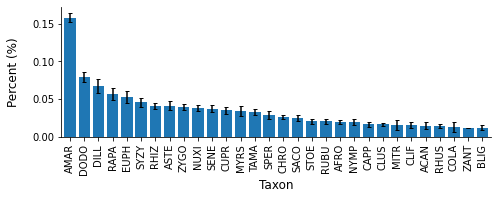

In [ ]:
if __name__ == '__main__':
    # Load the csv using pandas
    df = pd.read_csv('OlsenVeg.csv')

    # Filter rows for biomes that occur in less than 10 sites
    df = df.groupby("BIO_N").filter(lambda x: len(x) >= 10)

    # Remove non-pollen columns; all rows, starting at 9th column onwards
    pollen_only = df.iloc[:, 9:]

    # Convert data to a matrix
    ##pandas.DataFrame.values: Only the values in the DataFrame will be returned, the axes labels will be removed.
    pollen_matrix = pollen_only.values

    # Rename input data (pollen) to 'x', output data (biomes) to 'y'
    x = pollen_matrix.copy()
    ##Categoricals can only take on only a limited, and usually fixed, number of possible values (categories). In contrast to statistical categorical variables, a Categorical might have an order, but numerical operations (additions, divisions, …) are not possible.
    cat = pd.Categorical(df.BIO_N)
    # Convert category names to numbers
    y = cat.codes
    # Store names of the categories (i.e. biomes)
    labels = cat.categories

    x = exclude_rare_taxa(x)

    # Scale values so between [0,1]s
    x /= 100
    print("Max: {}; Min: {}".format(x.max(), x.min()))

    # Define all classifiers and hyper-parameters
    classifiers = [
        {
            'model': LogisticRegression(random_state=seed),
            'param_dist': {
                'class_weight': [None, 'balanced'],
                'fit_intercept': [True, False],
                'C': uniform(0, 1000),
                'solver': ['lbfgs'],
                'multi_class': ['ovr', 'multinomial'],
            },
        },
        {
            'model': RandomForestClassifier(
                random_state=seed),
            'param_dist': {
                'n_estimators': randint(10, 200),
                'criterion': ['gini', 'entropy'],
                'max_features': ['auto', 'sqrt', 'log2', None],
                'min_samples_split': uniform(0.0, 1),
                'class_weight': ['balanced', 'balanced_subsample'],
            },
        },
        {
            'model': MLPClassifier(random_state=seed),
            'param_dist': {
                'hidden_layer_sizes': [(50,), (100,), (200,)],
                'alpha': uniform(0, 0.1),
                'activation': ['logistic', 'tanh', 'relu'],
                'solver': ['adam'],
                'batch_size': [32, 64, 128],
                'learning_rate': ['constant', 'adaptive'],
                'learning_rate_init': [0.0001],
                'max_iter': randint(20, 200),
            },
        },
        {
            'model': LinearDiscriminantAnalysis(),
            'param_dist': {
                'solver': ['svd', 'eigen', 'lsqr'],
                'n_components': randint(1, 5),
            },
        },
        {
            'model': GaussianNB(),
            'param_dist': None,
        },
        {
            'model': MultinomialNB(),
            'param_dist': {
                'fit_prior': [True, False],
                'alpha': uniform(0, 1),
            },
        },
        {
            'model': BernoulliNB(),
            'param_dist': {
                'fit_prior': [True, False],
                'alpha': uniform(0, 1),
            },
        },
        {
            'model': KNeighborsClassifier(),
            'param_dist': {
                'n_neighbors': randint(1, 10),
                'weights': ['uniform', 'distance'],
                'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                'p': randint(1, 4),
            },
        },
        {
            'model': DecisionTreeClassifier(random_state=seed),
            'param_dist': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_features': ['auto', 'sqrt', 'log2', None],
                'min_samples_split': uniform(0.0, 1),
                'class_weight': ['balanced', None],
            },
        },
        {
            'model': SVC(probability=True, random_state=seed),
            'param_dist': {
                'C': uniform(0.001, 100),
                'gamma': uniform(0.001, 1000),
                'kernel': ['rbf', 'poly', 'sigmoid'],
                'degree': randint(1, 4),
            },
        },
    ]

    # Create dictionaries for storing models and results
    all_metrics = {}
    all_models = {}
    feature_importance = {}
    all_confusions = {}
    test_metrics = {}
    test_confusion = {}

    # Create the output directory
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    # Split into train/test sets. Training set = 90%
    ##stratify parameter will preserve the proportion of target as in original dataset, in the train and test datasets as well. Often, we want to preserve the dataset proportions for better prediction and reproduceability of results
    x, x_test, y, y_test = train_test_split(x, y,
                                            test_size=0.1,
                                            random_state=seed,
                                            stratify=y)
    # Loop over all models
    for clf_dict in classifiers:
        clf = clf_dict['model']
        param_dist = clf_dict['param_dist']
        print("#" * 80)
        print("Fitting: {}".format(clf))

        # Use StratifiedKFold for k-fold data splitting when there are
        # large class imbalances
        folds = StratifiedKFold(
            n_splits=n_folds,
            shuffle=True,
            random_state=seed)

        if param_dist is not None:
            # Only do hyperparameter search if param_dist is not 'None',
            # i.e. if the model has no hyper-parameters to search over
            random_search = RandomizedSearchCV(
                clf,
                cv=folds, ##Cross_fold
                verbose=1, #Controls the verbosity: the higher, the more messages.
                n_jobs=4, #Parallell jobs
                param_distributions=param_dist,
                n_iter=n_iter_search,
                random_state=seed)

            # Do hyperparameter search
            random_search.fit(x, y)

            print("Best parameters:")
            print(random_search.best_params_)

            clf.set_params(**random_search.best_params_)

        test_metrics = defaultdict(list)
        models = []
        scores = defaultdict(list)
        confusion_mat = []

        # Train on all training data and get test performance
        ##The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’,
        pipe = Pipeline(steps=[
            ('clf', clf),
        ])

        pipe, cm = train_and_validate(pipe, x, y, x_test, y_test,
                                      test_metrics, scores)
        models.append(pipe)
        confusion_mat.append(cm)

        # Display evaluation metrics
        print("\nSummary on test set:")
        print("Model: {}".format(clf.__class__.__name__))
        print("#" * 50)
        for metric in sorted(test_metrics.keys()):
            m = test_metrics[metric]
            print("{:<24}: {:.5f} ({:.5f})".format(
                metric,
                np.mean(m),
                np.std(m)))

        # Save model and evaluation metrics for later
        all_metrics[clf.__class__.__name__] = test_metrics
        all_models[clf.__class__.__name__] = models
        feature_importance[clf.__class__.__name__] = scores
        all_confusions[clf.__class__.__name__] = np.stack(confusion_mat)

        # Save model and evaluation metrics to disk
        dump = {
            'test_metrics': test_metrics,
            'models': models,
            'scores': scores,
        }
        joblib.dump(dump, '{}/{}_dump.pkl'.format(
            out_dir, clf.__class__.__name__))

    # Write metrics for all models out to csv
    df_metrics = {}

    for model in all_metrics:
        val_metrics = all_metrics[model]
        data = []
        index = []
        for metric in sorted(val_metrics.keys()):
            m = val_metrics[metric]
            data.append(np.mean(m))
            index.append(metric + "_mean")
            data.append(np.std(m))
            index.append(metric + "_std")

        df_metrics[model] = pd.Series(data, index=index)

    df_metrics = pd.DataFrame(df_metrics).transpose()
    df_metrics.to_csv("{}/results.csv".format(out_dir))

    # Write confusion matrices, precision, recall and f1 for all models out
    # to csv
    for model in all_confusions:
        df_conf = pd.DataFrame(all_confusions[model].mean(axis=0))
        df_conf.columns = labels

        # Calculate class based precision/recall
        conf = df_conf.values
        recall = conf.diagonal() / conf.sum(axis=0)
        precision = conf.diagonal() / conf.sum(axis=1)
        f1 = 2 * (precision * recall) / (precision + recall)

        # Calculate Cohen's Kappa
        prob_mat = conf / conf.sum()
        row_sum = prob_mat.sum(axis=0)
        col_sum = prob_mat.sum(axis=1)

        kappa = ((
            prob_mat.diagonal() - row_sum * col_sum) /
            ((row_sum + col_sum) / 2 - row_sum * col_sum))

        df_conf['recall'] = pd.Series(recall, df_conf.index)
        df_conf['precision'] = pd.Series(precision, df_conf.index)
        df_conf['f1'] = pd.Series(f1, df_conf.index)
        df_conf['kappa'] = pd.Series(kappa, df_conf.index)

        df_conf.to_csv("{}/{}_confusion.csv".format(out_dir, model))

    # Plot and output to csv feature importances for all models
    for model in feature_importance:
        mean_decrease_in_accuracy = []
        for k in feature_importance[model].keys():
            scores = feature_importance[model][k]
            mean_score = np.mean(scores)
            ##standard error of the mean
            sem_score = scipy.stats.sem(scores)
            if mean_score > 0:
                mean_decrease_in_accuracy.append(
                    (k, mean_score, sem_score))

        mean_decrease_in_accuracy.sort(key=lambda x: x[1], reverse=True)

        # Plot feature importances and write to pdf
        names, scores, sems = zip(*mean_decrease_in_accuracy[:30])
        plt.clf()
        plt.bar(range(len(names)), scores, yerr=sems, capsize=2)
        plt.xticks(
            range(len(names)),
            [name[:4] for name in names],
            rotation='vertical',
            fontsize=10)

        plt.ylabel("Percent (%)", fontsize=12, labelpad=12)
        plt.ylim(ymin=0)
        plt.xlabel("Taxon", fontsize=12)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.xlim((-0.6, len(names) - 0.4))
        plt.tight_layout(rect=[0, 0.05, 1, 1])
        fig = plt.gcf()
        fig.set_size_inches(7, 3)
        fig.savefig(
            '{}/{}_mean_decrease_accuracy.pdf'.format(out_dir, model),
            dpi=300)

        # Write feature importances to csv
        mda_series = pd.Series(scores, index=names)
        mda_series.to_csv(
            '{}/{}_mean_decrease.csv'.format(out_dir, model))


In [ ]:
#To unpickle
import pickle

with open('serialized.pkl', 'rb') as f:
    data = pickle.load(f)